# Flipkart Laptop Data- Business Insights on Product 
##### Submitted By- Priyanka Tanpure

### **Problem Statement**

Elon Musk has started his own laptop company (Tesla Laptop) in India. He wants to give tough fights to big companies like Apple, Alienware, HP etc.

He does not know how to estimate the price of laptops his company creates. In this competitive laptop market you cannot simply assume things. 

Musk wants to find out some relation between features of a Laptop(eg:- RAM, OS,  etc) and its selling price. But he is not so good at Data Mining. 😥

To solve this problem he already asked his Data Engineering team (from Twitter 🐥🤭) to collect laptop data from various competitors.

Now he needs your (i.e Data Scientist’s) help to solve the following problem. 🥰


### Sprint - 1 (Data Analysis and Mining)

**Musk’s Requirements**

1. Build an interface (using streamlit) for Elon Musk where he can enter the laptop features like RAM Size, RAM Type, HDD, OS, etc. and get the price prediction.

2. Based on your Data Analysis and MIning skills, give recommendations to Elon Musk on how the pricing works in the laptop market.


### Sprint - 2 (ML Model Tuning)

Congratulations! Elon Musk is happy with your models and insights that you have shared in the previous requirements. 

Now he wants you to test the models you have created for Underfitting and Overfitting. He wants you to build a best fit model.

**Todo -**
1. First try to check if the models you have created are a best fit or not.
2. See if applying cross validation helps improve your models performance.


#### Importing Required Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Dataframe

In [2]:
# Loading the Data
df = pd.read_csv(r'F:\Priya\Courses\Innomatics\Data Analysis Jupiter Notebook\Task 3\laptop_details.csv')
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


#### Data Handling and Cleaning

In [3]:
print(df['Feature'][0])
print('\n')
print(df['Feature'][1])
print('\n')
print(df['Feature'][3])
print('\n')
print(df['Feature'][6])

Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty


Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty


AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty


Processor: Intel i3-1115G4 (Base- 1.70 GHz & Turbo up to 4.10 GHz) 2 CoresRAM & Storage: 8GB DDR4 & 1TB + 256GB SSDGraphics & Keyboard: Integrated & Standard KeyboardDisplay: 15.6" FHD WVA AG Narrow BorderPorts: 2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 slot for solid-state drive/Intel OptaneIntel Core i3 Processor (11th Gen)8 GB DDR4 RAMWindows 11 Operating System1 TB HDD|256 GB SSD39.62 cm

In [4]:
# Processor Information
regex = r'^(?:AMD|Intel|M1|M2|Qualcomm)[\s\w]+Processor'
df['Processor'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [5]:
temp = df['Feature'][100]
regex = r'\d+\sGB[\s\w]+RAM'
fun = lambda x : re.findall(regex, x)
print(fun(temp))

['8 GB DDR4 RAM']


In [6]:
# RAM Information
regex = r'\d+\sGB[\s\w]+RAM'
df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [7]:
# OS Information
# regex = r'[\d]+[\s]bit[\s\w]+Operating System'
regex = r'(?:Windows|Chrome|Mac|Doc)[\s\w]+Operating System'
df['OS'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [8]:
# Storage Information
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
df['Storage'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [9]:
# Brand Information
regex = r'^\w+'
df['Brand'] = df['Product'].apply(lambda x : re.findall(regex, x))

In [10]:
# Display Information in cm
regex = r'\d+\.\d+\scm[\s\w]'
df['Display CM'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [11]:
# regex = r'\d+[\s\w]+\s(?:Warranty|DisplayOffice Home and Student)'
# df['Warranty'] = df['Feature'].apply(lambda x : re.findall(regex, x))
# df

In [12]:
# Touch Screen Information
# regex = r'\s(?:Touchscreen)'
# df['Touch Display'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [13]:
# Checking Dataframe
df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,Display CM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[256 GB SSD],[Lenovo],[35.56 cm ]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[Lenovo],[39.62 cm ]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[ASUS],[39.62 cm ]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[Windows 10 Operating System],[512 GB SSD],[HP],[39.62 cm ]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[ASUS],[39.62 cm ]
...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,[Intel Celeron Dual Core Processor],[4 GB LPDDR4 RAM],[Chrome Operating System],[],[ASUS],[29.46 cm ]
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 7 Octa Core Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[Lenovo],[39.62 cm ]
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,[AMD Ryzen 9 Octa Core Processor],[16 GB DDR5 RAM],[Windows 11 Operating System],[1 TB SSD],[ASUS],[39.62 cm ]
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,[Intel Core i7 Processor],[16 GB LPDDR5 RAM],[Windows 11 Operating System],[512 GB SSD],[ASUS],[35.56 cm ]


In [14]:
# TouchCount = df[df['Feature'].str.contains("Touchscreen",na=False)] 
# TouchCount

In [15]:
# TouchCount.shape

In [16]:
# Checking Data Types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   Rating      581 non-null    float64
 2   MRP         720 non-null    object 
 3   Feature     720 non-null    object 
 4   Processor   720 non-null    object 
 5   RAM         720 non-null    object 
 6   OS          720 non-null    object 
 7   Storage     720 non-null    object 
 8   Brand       720 non-null    object 
 9   Display CM  720 non-null    object 
dtypes: float64(1), object(9)
memory usage: 56.4+ KB


In [17]:
# Checking Missing Values
df.isnull().sum()

Product         0
Rating        139
MRP             0
Feature         0
Processor       0
RAM             0
OS              0
Storage         0
Brand           0
Display CM      0
dtype: int64

In [18]:
df.Rating.fillna(df.Rating.median(), inplace = True)

In [19]:
df.isnull().sum()

Product       0
Rating        0
MRP           0
Feature       0
Processor     0
RAM           0
OS            0
Storage       0
Brand         0
Display CM    0
dtype: int64

In [20]:
print(df['Processor'][0])
print(type(df['Processor'][0]))

['Intel Core i3 Processor']
<class 'list'>


In [21]:
# Converting List into String
print(''.join(df['Processor'][0]))
print(type(''.join(df['Processor'][0])))

Intel Core i3 Processor
<class 'str'>


In [22]:
# COnverting List into String
df.Processor = df.Processor.apply(lambda x : ''.join(x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))
df.OS = df.OS.apply(lambda x : ''.join(x))
df.Storage = df.Storage.apply(lambda x : ''.join(x))
df.Brand = df.Brand.apply(lambda x : ''.join(x))
df['Display CM'] = df['Display CM'].apply(lambda x : ''.join(x))
# df['Touch Display'] = df['Touch Display'].apply(lambda x : ''.join(x))

In [23]:
# Checking the Dataframe
df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,Display CM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,Lenovo,35.56 cm
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo,39.62 cm
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS,39.62 cm
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,HP,39.62 cm
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS,39.62 cm
...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,,ASUS,29.46 cm
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo,39.62 cm
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,4.3,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,1 TB SSD,ASUS,39.62 cm
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,ASUS,35.56 cm


In [24]:
# Checking TouchScreen Value Counts
# df['Touch Display'].value_counts()

In [25]:
df.MRP = df.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(int)
df['Display CM'] = df['Display CM'].apply(lambda x : x.replace('cm', '')).astype(float)
df['Display INCH'] = round(df['Display CM']/2.54, 2)
df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,Display CM,Display INCH
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,Lenovo,35.56,14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo,39.62,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS,39.62,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,HP,39.62,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS,39.62,15.6
...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,,ASUS,29.46,11.6
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo,39.62,15.6
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,4.3,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,1 TB SSD,ASUS,39.62,15.6
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,ASUS,35.56,14.0


In [26]:
df['Touchscreen'] = df['Feature'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [27]:
df.Touchscreen.value_counts()

0    681
1     39
Name: Touchscreen, dtype: int64

In [28]:
# Checking Null Values
df.isnull().sum()

Product         0
Rating          0
MRP             0
Feature         0
Processor       0
RAM             0
OS              0
Storage         0
Brand           0
Display CM      0
Display INCH    0
Touchscreen     0
dtype: int64

In [29]:
# df.isna().any()

In [30]:
# Checking the Missing Rows
print(df.Storage.value_counts())
print('\n')
print(df.Processor.value_counts())
print('\n')
print(df.OS.value_counts())
print('\n')
print(df.Brand.value_counts())
print('\n')
print(df.RAM.value_counts())

512 GB SSD                      375
1 TB SSD                        176
256 GB SSD                       98
1 TB HDD256 GB SSD               26
1 TB HDD                         17
                                 10
2 TB SSD                          7
128 GB SSD                        6
1 TB HDD512 GB SSD                2
128 GB SSD1 TB HDD128 GB SSD      2
256 GB HDD256 GB SSD              1
Name: Storage, dtype: int64


Intel Core i5 Processor                   150
Intel Core i3 Processor                   129
AMD Ryzen 9 Octa Core Processor            87
AMD Ryzen 7 Octa Core Processor            79
                                           50
Intel Core i7 Processor                    49
AMD Ryzen 5 Hexa Core Processor            48
AMD Ryzen 3 Dual Core Processor            42
AMD Ryzen 5 Quad Core Processor            37
Intel Celeron Dual Core Processor          20
Intel Core i9 Processor                    10
AMD Ryzen 3 Quad Core Processor             4
Intel Pentium Quad Cor

In [31]:
# RAM attributes Cleaning
df.RAM.replace({'8 GB DDR4 RAM':'8GB DDR4'}, inplace=True)
df.RAM.replace({'16 GB DDR4 RAM':'16GB DDR4'}, inplace=True)
df.RAM.replace({'32 GB DDR4 RAM':'32GB DDR4'}, inplace=True)
df.RAM.replace({'8 GB DDR5 RAM':'8GB DDR5'}, inplace=True)
df.RAM.replace({'16 GB DDR5 RAM':'16GB DDR5'}, inplace=True)
df.RAM.replace({'32 GB DDR5 RAM':'32GB DDR5'}, inplace=True)
df.RAM.replace({'4 GB DDR4 RAM':'4GB DDR4'}, inplace=True)
df.RAM.replace({'4 GB LPDDR4X RAM':'4GB LPDDR4X'}, inplace=True)
df.RAM.replace({'8 GB LPDDR4X RAM':'8GB LPDDR4X'}, inplace=True)
df.RAM.replace({'16 GB LPDDR4X RAM':'16GB LPDDR4X'}, inplace=True)
df.RAM.replace({'32 GB LPDDR4X RAM':'32GB LPDDR4X'}, inplace=True)
df.RAM.replace({'16 GB LPDDR5 RAM':'16GB LPDDR5'}, inplace=True)
df.RAM.replace({'4 GB LPDDR4 RAM':'4GB LPDDR4'}, inplace=True)
df.RAM.replace({'16 GB LPDDR4 RAM':'16GB LPDDR4'}, inplace=True)
df.RAM.replace({'8 GB Unified Memory RAM':'8GB UnifiedMemory'}, inplace=True)
df.RAM.replace({'16 GB Unified Memory RAM':'16GB UnifiedMemory'}, inplace=True)
df.RAM.replace({'32 GB Unified Memory RAM':'32GB UnifiedMemory'}, inplace=True)
df.RAM.replace({'128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM':'8GB DDR4'}, inplace=True)
df.RAM.replace({'16 GB LPDDR3 RAM':'16GB LPDDR3'}, inplace=True)

In [32]:
# Creating columns RAM Size and RAM Type
df[['RAM Size GB', 'RAM Type']] = df.RAM.str.split(' ', expand = True)

In [33]:
df['RAM Size GB'] = df['RAM Size GB'].apply(lambda x : x.replace('GB', '')).astype(int)

In [34]:
# Checking Empty Rows in Storage
df[df['Storage']=='']

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,Display CM,Display INCH,Touchscreen,RAM Size GB,RAM Type
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...,4.4,32990,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...,Qualcomm Snapdragon 7c Gen 2 Processor,4GB LPDDR4X,Windows 11 Operating System,,SAMSUNG,35.56,14.0,0,4,LPDDR4X
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,4.3,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core Processor,4GB DDR4,Chrome Operating System,,Lenovo,35.56,14.0,0,4,DDR4
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,4.3,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core Processor,4GB DDR4,Chrome Operating System,,Lenovo,35.56,14.0,0,4,DDR4
345,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,14990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4GB LPDDR4,Chrome Operating System,,ASUS,29.46,11.6,1,4,LPDDR4
509,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,24390,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4GB LPDDR4,Chrome Operating System,,ASUS,39.62,15.6,1,4,LPDDR4
544,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.5,21990,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core Processor,4GB DDR4,Windows 11 Operating System,,ASUS,29.46,11.6,0,4,DDR4
559,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.0,19990,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core Processor,4GB DDR4,Windows 11 Operating System,,ASUS,29.46,11.6,0,4,DDR4
632,Lenovo IdeaPad Flex 3 Chromebook Celeron Dual ...,3.6,28490,Intel Celeron Dual Core Processor4 GB LPDDR4X ...,Intel Celeron Dual Core Processor,4GB LPDDR4X,Chrome Operating System,,Lenovo,29.46,11.6,1,4,LPDDR4X
695,ASUS Chromebook Celeron Dual Core - (4 GB/64 G...,4.1,25990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4GB LPDDR4,Chrome Operating System,,ASUS,35.56,14.0,1,4,LPDDR4
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4GB LPDDR4,Chrome Operating System,,ASUS,29.46,11.6,1,4,LPDDR4


In [35]:
print(df.Feature[83])
print('\n')
print(df.Feature[89])
print('\n')
print(df.Feature[96])
print('\n')
print(df.Feature[345])
print('\n')
print(df.Feature[509])
print('\n')
print(df.Feature[544])
print('\n')
print(df.Feature[559])
print('\n')
print(df.Feature[632])
print('\n')
print(df.Feature[695])
print('\n')
print(df.Feature[715])

Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPDDR4X RAMWindows 11 Operating System35.56 cm (14 Inch) DisplayOffice Home and Student 20211 Year Onsite Warranty


Intel Celeron Dual Core Processor4 GB DDR4 RAMChrome Operating System35.56 cm (14 Inch) Display1 Year Carry-in Warranty


Intel Celeron Dual Core Processor4 GB DDR4 RAMChrome Operating System35.56 cm (14 Inch) Display1 Year Carry-in Warranty


Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System29.46 cm (11.6 inch) Touchscreen Display1 Year Onsite Warranty


Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System39.62 cm (15.6 inch) Touchscreen Display1 Year Onsite Warranty


Intel Celeron Dual Core Processor4 GB DDR4 RAM64 bit Windows 11 Operating System29.46 cm (11.6 Inch) Display1 Year Onsite warranty


Intel Celeron Dual Core Processor4 GB DDR4 RAM64 bit Windows 11 Operating System29.46 cm (11.6 Inch) Display1 Year Onsite warranty


Intel Celeron Dual Core Processor4 GB LPDDR4X RAM64 bit Ch

In [36]:
print(df.Product[83])
print('\n')
print(df.Product[89])
print('\n')
print(df.Product[96])
print('\n')
print(df.Product[345])
print('\n')
print(df.Product[509])
print('\n')
print(df.Product[544])
print('\n')
print(df.Product[559])
print('\n')
print(df.Product[632])
print('\n')
print(df.Product[695])
print('\n')
print(df.Product[715])

SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (4 GB/128 GB EMMC Storage/Windows 11 Home) NP340XLA-KA1IN...


Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14IGL05 Thin and Light Lap...


Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14IGL05 Thin and Light Lap...


ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/32 GB EMMC Storage/Chrome OS) C214MA-BU0704 Chrom...


ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C523NA-A20303 Chrom...


ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 GB EMMC Storage/Windows 11 Home) E210MA-GJ011W Thin and L...


ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 GB EMMC Storage/Windows 11 Home) E210MA-GJ012W Thin and L...


Lenovo IdeaPad Flex 3 Chromebook Celeron Dual Core - (4 GB/128 GB EMMC Storage/Chrome OS) CB 11IJL6 Ch...


ASUS Chromebook Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C423NA-EC0521 Chromebook


ASUS Chromebook Flip Touch Celeron Du

In [37]:
# Storage Rows 
df.iloc[83,7]='128GB EMMC'
df.iloc[89,7]='64GB EMMC'
df.iloc[96,7]='64GB EMMC'
df.iloc[345,7]='32GB EMMC'
df.iloc[509,7]='64GB EMMC'
df.iloc[544,7]='64GB EMMC'
df.iloc[559,7]='64GB EMMC'
df.iloc[632,7]='128GB EMMC'
df.iloc[695,7]='64GB EMMC'
df.iloc[715,7]='64GB EMMC'

In [38]:
# Unique Elements in Storage Column
df.Storage.unique()

array(['256 GB SSD', '512 GB SSD', '1 TB HDD256 GB SSD', '1 TB SSD',
       '256 GB HDD256 GB SSD', '128GB EMMC', '64GB EMMC', '1 TB HDD',
       '128 GB SSD', '32GB EMMC', '1 TB HDD512 GB SSD',
       '128 GB SSD1 TB HDD128 GB SSD', '2 TB SSD'], dtype=object)

In [39]:
# Cleaning the Storage Column
# df.Storage.replace({'256 GB SSD':'256GB SSD'}, inplace=True)
# df.Storage.replace({'512 GB SSD':'512GB SSD'}, inplace=True)
# df.Storage.replace({'1 TB SSD':'1TB SSD'}, inplace=True)
# df.Storage.replace({'1 TB HDD':'1TB HDD'}, inplace=True)
# df.Storage.replace({'128 GB SSD':'128GB SSD'}, inplace=True)
# df.Storage.replace({'2 TB SSD':'2TB SSD'}, inplace=True)
# df.Storage.replace({'1 TB HDD256 GB SSD':'1TB HDD'}, inplace=True)
# df.Storage.replace({'256 GB HDD256 GB SSD':'256GB HDD'}, inplace=True)
# df.Storage.replace({'1 TB HDD512 GB SSD':'1TB HDD'}, inplace=True)
# df.Storage.replace({'128 GB SSD1 TB HDD128 GB SSD':'1TB HDD'}, inplace=True)

In [40]:
# Creating Columns Storage Size and Storage Type
# df[['Storage Size', 'Storage Type']] = df.Storage.str.split(' ', expand = True)

In [41]:
df.Storage.replace({'256 GB SSD':'256GB SSD'}, inplace=True)
df.Storage.replace({'512 GB SSD':'512GB SSD'}, inplace=True)
df.Storage.replace({'1 TB SSD':'1TB SSD'}, inplace=True)
df.Storage.replace({'1 TB HDD':'1TB HDD'}, inplace=True)
df.Storage.replace({'128 GB SSD':'128GB SSD'}, inplace=True)
df.Storage.replace({'2 TB SSD':'2TB SSD'}, inplace=True)
df.Storage.replace({'1 TB HDD256 GB SSD':'256GB SSD + 1TB HDD'}, inplace=True)
df.Storage.replace({'256 GB HDD256 GB SSD':'256GB SSD + 256GB HDD'}, inplace=True)
df.Storage.replace({'1 TB HDD512 GB SSD':'512GB SSD + 1TB HDD'}, inplace=True)
df.Storage.replace({'128 GB SSD1 TB HDD128 GB SSD':'128GB SSD + 1TB HDD'}, inplace=True)

In [42]:
df.Storage.value_counts()

512GB SSD                375
1TB SSD                  176
256GB SSD                 98
256GB SSD + 1TB HDD       26
1TB HDD                   17
64GB EMMC                  7
2TB SSD                    7
128GB SSD                  6
128GB EMMC                 2
512GB SSD + 1TB HDD        2
128GB SSD + 1TB HDD        2
256GB SSD + 256GB HDD      1
32GB EMMC                  1
Name: Storage, dtype: int64

In [43]:
df['Storage'] = df['Storage'].astype(str).replace('\.0', '', regex=True)
df["Storage"] = df["Storage"].str.replace('GB', '')
df["Storage"] = df["Storage"].str.replace('TB', '000')
new = df["Storage"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1EMMC"] = df["first"].apply(lambda x: 1 if "EMMC" in x else 0)
# df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2EMMC"] = df["second"].apply(lambda x: 1 if "EMMC" in x else 0)
# df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD GB"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD GB"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["EMMC GB"]=(df["first"]*df["Layer1EMMC"]+df["second"]*df["Layer2EMMC"])
# df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1EMMC', 'Layer2HDD', 'Layer2SSD', 'Layer2EMMC'],inplace=True)

In [44]:
df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,Display CM,Display INCH,Touchscreen,RAM Size GB,RAM Type,HDD GB,SSD GB,EMMC GB
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8GB DDR4,Windows 11 Operating System,256 SSD,Lenovo,35.56,14.0,0,8,DDR4,0,256,0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8GB DDR4,Windows 11 Operating System,512 SSD,Lenovo,39.62,15.6,0,8,DDR4,0,512,0
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8GB DDR4,Windows 11 Operating System,512 SSD,ASUS,39.62,15.6,0,8,DDR4,0,512,0
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8GB DDR4,Windows 10 Operating System,512 SSD,HP,39.62,15.6,0,8,DDR4,0,512,0
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8GB DDR4,Windows 11 Operating System,512 SSD,ASUS,39.62,15.6,0,8,DDR4,0,512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4GB LPDDR4,Chrome Operating System,64 EMMC,ASUS,29.46,11.6,1,4,LPDDR4,0,0,64
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8GB DDR4,Windows 11 Operating System,512 SSD,Lenovo,39.62,15.6,0,8,DDR4,0,512,0
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,4.3,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16GB DDR5,Windows 11 Operating System,1000 SSD,ASUS,39.62,15.6,0,16,DDR5,0,1000,0
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16GB LPDDR5,Windows 11 Operating System,512 SSD,ASUS,35.56,14.0,1,16,LPDDR5,0,512,0


In [45]:
df['SSD GB'].value_counts()

512     377
1000    176
256     125
0        27
128       8
2000      7
Name: SSD GB, dtype: int64

In [46]:
df['HDD GB'].value_counts()

0       672
1000     47
256       1
Name: HDD GB, dtype: int64

In [47]:
df['EMMC GB'].value_counts()

0      710
64       7
128      2
32       1
Name: EMMC GB, dtype: int64

In [48]:
# Checking Empty rows in Processor
df[df['Processor']=='']

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,Display CM,Display INCH,Touchscreen,RAM Size GB,RAM Type,HDD GB,SSD GB,EMMC GB
6,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,4.3,38990,Processor: Intel i3-1115G4 (Base- 1.70 GHz & T...,,8GB DDR4,Windows 11 Operating System,256 SSD + 1000 HDD,DELL,39.62,15.6,0,8,DDR4,1000,256,0
8,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,46990,Stylish & Portable Thin and Light Laptop14 inc...,,8GB DDR4,Windows 10 Operating System,256 SSD,realme,35.56,14.0,0,8,DDR4,0,256,0
20,APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...,4.7,88990,Apple M1 Processor8 GB DDR4 RAMMac OS Operatin...,,8GB DDR4,Mac OS Operating System,256 SSD,APPLE,33.78,13.3,0,8,DDR4,0,256,0
29,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,46990,Stylish & Portable Thin and Light Laptop14 inc...,,8GB DDR4,Windows 10 Operating System,256 SSD,realme,35.56,14.0,0,8,DDR4,0,256,0
33,acer Aspire 7 Ryzen 5 Hexa Core AMD R5-5500U -...,4.4,47990,Free upgrade to Windows 11 when availableAMD R...,,8GB DDR4,Windows 11 when availableAMD Ryzen 5 Hexa Core...,512 SSD,acer,39.62,15.6,0,8,DDR4,0,512,0
53,realme Book(Slim) Intel Evo Core i5 11th Gen -...,4.4,59990,Powered by 11th Gen Intel Evo Core i5 Processo...,,8GB DDR4,Windows 10 Operating System,512 SSD,realme,35.56,14.0,0,8,DDR4,0,512,0
54,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,47990,Free upgrade to Windows 11 when availableIntel...,,8GB DDR4,Windows 10 Operating System,512 SSD,acer,39.62,15.6,0,8,DDR4,0,512,0
64,APPLE 2022 MacBook Pro M2 - (8 GB/512 GB SSD/M...,4.7,139990,Apple M2 Processor8 GB Unified Memory RAMMac O...,,8GB UnifiedMemory,Mac OS Operating System,512 SSD,APPLE,33.78,13.3,0,8,UnifiedMemory,0,512,0
69,DELL Ryzen 5 Hexa Core AMD R5-5600H - (16 GB/5...,4.6,70990,Processor: AMD Ryzen R5-5600H (3.30 GHz up to ...,,16GB DDR4,Windows 11 Operating System,512 SSD,DELL,39.62,15.6,0,16,DDR4,0,512,0
79,APPLE 2021 Macbook Pro M1 Pro - (16 GB/512 GB ...,4.8,181990,Apple M1 Pro Processor16 GB Unified Memory RAM...,,16GB UnifiedMemory,Mac OS Operating System,512 SSD,APPLE,36.07,14.2,0,16,UnifiedMemory,0,512,0


In [49]:
# print(df.Feature[6])
# print('\n')
# print(df.Feature[8])
# print('\n')
# print(df.Feature[29])
# print('\n')
# print(df.Feature[33])
# print('\n')
# print(df.Feature[53])
# print('\n')
# print(df.Feature[54])
# print('\n')
# print(df.Feature[69])
# print('\n')
# print(df.Feature[83])
# print('\n')
# print(df.Feature[94])
# print('\n')
# print(df.Feature[116])
# print('\n')
# print(df.Feature[122])
# print('\n')
# print(df.Feature[142])
# print('\n')
# print(df.Feature[172])
# print('\n')
# print(df.Feature[232])
# print('\n')
# print(df.Feature[249])
# print('\n')
# print(df.Feature[253])
# print('\n')
# print(df.Feature[259])
# print('\n')
# print(df.Feature[349])
# print('\n')
# print(df.Feature[355])
# print('\n')
# print(df.Feature[393])
# print('\n')
# print(df.Feature[438])
# print('\n')
# print(df.Feature[443])
# print('\n')
# print(df.Feature[502])
# print('\n')
# print(df.Feature[508])
# print('\n')
# print(df.Feature[593])
# print('\n')
# print(df.Feature[622])
# print('\n')
# print(df.Feature[628])
# print('\n')
# print(df.Feature[643])
# print('\n')
# print(df.Feature[644])
# print('\n')
# print(df.Feature[645])
# print('\n')
# print(df.Feature[688])
# print('\n')
# print(df.Feature[689])

In [50]:
# df[df['Processor']=='']

In [51]:
# Updating Processors Rows
df.iloc[6,4]='Intel i3-1115G4'
df.iloc[8,4]='Intel Core i3'
df.iloc[20,4]='Apple M1'
df.iloc[29,4]='Intel Core i3'
df.iloc[33,4]='AMD Ryzen 5 Hexa Core'
df.iloc[53,4]='Intel Evo Core i5'
df.iloc[54,4]='Intel Core i5'
df.iloc[64,4]='Apple M2'
df.iloc[69,4]='AMD Ryzen R5-5600H'
df.iloc[79,4]='Apple M1 Pro'
df.iloc[83,4]='Qualcomm Snapdragon 7c Gen 2'
df.iloc[85,4]='Apple M2'
df.iloc[94,4]='Intel PQC-N5030'
df.iloc[98,4]='Apple M1'
df.iloc[116,4]='Gen Intel Evo Core i5'
df.iloc[118,4]='Apple M1'
df.iloc[122,4]='AMD Ryzen 7 Octa Core'
df.iloc[124,4]='Apple M1'
df.iloc[142,4]='AMD Ryzen 3 Dual Core'
df.iloc[153,4]='Apple M1 Pro'
df.iloc[154,4]='Apple M1'
df.iloc[162,4]='Apple M1 Max'
df.iloc[168,4]='Apple M1 Pro'
df.iloc[172,4]='Intel i3-1115G4'
df.iloc[209,4]='Apple M1 Pro'
df.iloc[229,4]='Apple M1'
df.iloc[232,4]='Intel Core i7'
df.iloc[233,4]='Apple M2'
df.iloc[249,4]='Intel i3-1125G4'
df.iloc[253,4]='AMD Ryzen 5-3450U'
df.iloc[259,4]='Intel Core i5'
df.iloc[282,4]='Apple M2'
df.iloc[297,4]='Apple M2'
df.iloc[305,4]='Apple M1 Pro'
df.iloc[325,4]='Apple M1 Pro'
df.iloc[348,4]='Apple M1'
df.iloc[349,4]='Intel Core i5-1135G7'
df.iloc[355,4]='Intel Core i3-1005G1'
df.iloc[393,4]='Intel Core i5'
df.iloc[438,4]='Intel Core i5'
df.iloc[443,4]='Intel Core i7'
df.iloc[502,4]='AMD Ryzen 5 Hexa Core'
df.iloc[508,4]='Intel Core i5 Pro'
df.iloc[593,4]='Intel i7-11800H'
df.iloc[622,4]='Intel Core i7'
df.iloc[628,4]='Intel Core i9'
df.iloc[643,4]='Intel Core i7'
df.iloc[644,4]='Intel Core i5'
df.iloc[645,4]='AMD Ryzen 5 Hexa Core'
df.iloc[688,4]='Intel Core i7'
df.iloc[689,4]='Intel Core i7'

In [52]:
# Cleaning Processor Column
df.Processor.replace({'Intel Core i3 Processor':'Intel Core i3'}, inplace=True)
df.Processor.replace({'Intel Core i5 Processor':'Intel Core i5'}, inplace=True)
df.Processor.replace({'Intel Core i7 Processor':'Intel Core i7'}, inplace=True)
df.Processor.replace({'Intel Core i9 Processor':'Intel Core i9'}, inplace=True)
df.Processor.replace({'AMD Ryzen 3 Hexa Core Processor':'AMD Ryzen 3 Hexa Core'}, inplace=True)
df.Processor.replace({'AMD Ryzen 5 Hexa Core Processor':'AMD Ryzen 5 Hexa Core'}, inplace=True)
df.Processor.replace({'AMD Ryzen 7 Quad Core Processor':'AMD Ryzen 7 Quad Core'}, inplace=True)
df.Processor.replace({'AMD Ryzen 3 Quad Core Processor':'AMD Ryzen 3 Quad Core'}, inplace=True)
df.Processor.replace({'AMD Ryzen 5 Quad Core Processor':'AMD Ryzen 5 Quad Core'}, inplace=True)
df.Processor.replace({'AMD Ryzen 9 Octa Core Processor':'AMD Ryzen 9 Octa Core'}, inplace=True)
df.Processor.replace({'AMD Ryzen 7 Octa Core Processor':'AMD Ryzen 7 Octa Core'}, inplace=True)
df.Processor.replace({'Intel Celeron Dual Core Processor':'Intel Celeron Dual Core'}, inplace=True)
df.Processor.replace({'AMD Ryzen 3 Dual Core Processor':'AMD Ryzen 3 Dual Core'}, inplace=True)
df.Processor.replace({'AMD Athlon Dual Core Processor':'AMD Athlon Dual Core'}, inplace=True)
df.Processor.replace({'Intel Celeron Quad Core Processor':'Intel Celeron Quad Core'}, inplace=True)
df.Processor.replace({'Intel Pentium Silver Processor':'Intel Pentium Silver'}, inplace=True)
df.Processor.replace({'AMD Ryzen 5 Dual Core Processor':'AMD Ryzen 5 Dual Core'}, inplace=True)
df.Processor.replace({'Intel Pentium Quad Core Processor':'Intel Pentium Quad Core'}, inplace=True)
df.Processor.replace({'AMD Dual Core Processor':'AMD Dual Core'}, inplace=True)

In [53]:
# Unique Elements in Processor
df.Processor.unique()

array(['Intel Core i3', 'AMD Ryzen 5 Hexa Core', 'Intel Core i5',
       'Intel i3-1115G4', 'AMD Ryzen 7 Quad Core',
       'AMD Ryzen 5 Quad Core', 'AMD Ryzen 9 Octa Core',
       'AMD Ryzen 7 Octa Core', 'Apple M1', 'Intel Celeron Dual Core',
       'AMD Ryzen 3 Dual Core', 'AMD Athlon Dual Core',
       'Intel Evo Core i5', 'AMD Ryzen 3 Quad Core', 'Apple M2',
       'AMD Ryzen R5-5600H', 'Intel Celeron Quad Core', 'Intel Core i7',
       'Apple M1 Pro', 'Qualcomm Snapdragon 7c Gen 2', 'Intel PQC-N5030',
       'Gen Intel Evo Core i5', 'Apple M1 Max', 'Intel Core i9',
       'Intel Pentium Silver', 'Intel i3-1125G4', 'AMD Ryzen 5-3450U',
       'AMD Ryzen 5 Dual Core', 'Intel Core i5-1135G7',
       'Intel Core i3-1005G1', 'Intel Pentium Quad Core',
       'Intel Core i5 Pro', 'AMD Dual Core', 'Intel i7-11800H',
       'AMD Ryzen 3 Hexa Core'], dtype=object)

In [54]:
df['Processor'].value_counts()

Intel Core i5                   155
Intel Core i3                   131
AMD Ryzen 9 Octa Core            87
AMD Ryzen 7 Octa Core            80
Intel Core i7                    55
AMD Ryzen 5 Hexa Core            51
AMD Ryzen 3 Dual Core            43
AMD Ryzen 5 Quad Core            37
Intel Celeron Dual Core          20
Intel Core i9                    11
Apple M1                          7
Apple M1 Pro                      6
Apple M2                          5
AMD Ryzen 3 Quad Core             4
Intel Celeron Quad Core           3
Intel Pentium Quad Core           3
Intel i3-1115G4                   2
AMD Athlon Dual Core              2
Intel Pentium Silver              2
Intel Core i3-1005G1              1
Intel Core i5-1135G7              1
AMD Dual Core                     1
Intel Core i5 Pro                 1
AMD Ryzen 5-3450U                 1
Intel i7-11800H                   1
AMD Ryzen 5 Dual Core             1
Intel PQC-N5030                   1
Intel i3-1125G4             

In [55]:
df['Cpu Name'] = df['Processor'].apply(lambda x:" ".join(x.split()[0:3]))

In [56]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        elif text == 'Apple M1' or text == 'Apple M2' or text == 'Apple M1 Pro' or text == 'Apple M1 Max':
            return text
        elif text.split()[0] == 'AMD':
            return 'AMD Processor'
        else:
            return 'Qualcomm Snapdragon'

In [57]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [58]:
df.drop(columns=['Cpu Name'],inplace=True)

In [59]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,Display CM,Display INCH,Touchscreen,RAM Size GB,RAM Type,HDD GB,SSD GB,EMMC GB,Cpu Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,8GB DDR4,Windows 11 Operating System,256 SSD,Lenovo,35.56,14.0,0,8,DDR4,0,256,0,Intel Core i3
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,8GB DDR4,Windows 11 Operating System,512 SSD,Lenovo,39.62,15.6,0,8,DDR4,0,512,0,Intel Core i3
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3,8GB DDR4,Windows 11 Operating System,512 SSD,ASUS,39.62,15.6,0,8,DDR4,0,512,0,Intel Core i3
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core,8GB DDR4,Windows 10 Operating System,512 SSD,HP,39.62,15.6,0,8,DDR4,0,512,0,AMD Processor
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5,8GB DDR4,Windows 11 Operating System,512 SSD,ASUS,39.62,15.6,0,8,DDR4,0,512,0,Intel Core i5


In [60]:
df['Processor Brand'] = df.Processor.apply(lambda x:x.split()[0])
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,Display CM,Display INCH,Touchscreen,RAM Size GB,RAM Type,HDD GB,SSD GB,EMMC GB,Cpu Brand,Processor Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,8GB DDR4,Windows 11 Operating System,256 SSD,Lenovo,35.56,14.0,0,8,DDR4,0,256,0,Intel Core i3,Intel
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,8GB DDR4,Windows 11 Operating System,512 SSD,Lenovo,39.62,15.6,0,8,DDR4,0,512,0,Intel Core i3,Intel
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3,8GB DDR4,Windows 11 Operating System,512 SSD,ASUS,39.62,15.6,0,8,DDR4,0,512,0,Intel Core i3,Intel
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core,8GB DDR4,Windows 10 Operating System,512 SSD,HP,39.62,15.6,0,8,DDR4,0,512,0,AMD Processor,AMD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5,8GB DDR4,Windows 11 Operating System,512 SSD,ASUS,39.62,15.6,0,8,DDR4,0,512,0,Intel Core i5,Intel


In [61]:
df['Processor Brand'].value_counts()

Intel       389
AMD         310
Apple        19
Qualcomm      1
Gen           1
Name: Processor Brand, dtype: int64

In [62]:
df['Processor Brand'] = df['Processor Brand'].apply(lambda x : x.replace('Gen', 'Intel'))
# df['Display CM'] = df['Display CM'].apply(lambda x : x.replace('cm', '')).astype(float)

In [63]:
df['Processor Brand'].value_counts()

Intel       390
AMD         310
Apple        19
Qualcomm      1
Name: Processor Brand, dtype: int64

In [64]:
# Checking Empty Rows in OS 
df[df['OS']=='']

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,Display CM,Display INCH,Touchscreen,RAM Size GB,RAM Type,HDD GB,SSD GB,EMMC GB,Cpu Brand,Processor Brand
22,Lenovo Celeron Dual Core - (4 GB/256 GB HDD/25...,3.7,19490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core,4GB LPDDR4,,256 SSD + 256 HDD,Lenovo,39.62,15.6,0,4,LPDDR4,256,256,0,Other Intel Processor,Intel
169,Ultimus S151 Celeron Dual Core - (4 GB/128 GB ...,4.3,15990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core,4GB LPDDR4,,128 SSD,Ultimus,35.81,14.1,0,4,LPDDR4,0,128,0,Other Intel Processor,Intel
428,ASUS ExpertBook Core i3 11th Gen - (4 GB/256 G...,4.3,35990,Intel Core i3 Processor (11th Gen)4 GB DDR4 RA...,Intel Core i3,4GB DDR4,,256 SSD,ASUS,39.62,15.6,0,4,DDR4,0,256,0,Intel Core i3,Intel
473,Lenovo Thinkpad Ryzen 5 Hexa Core 5600U - (8 G...,4.5,69990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core,8GB DDR4,,512 SSD,Lenovo,35.56,14.0,0,8,DDR4,0,512,0,AMD Processor,AMD


In [65]:
# print(df.Feature[22])
# print('\n')
# print(df.Feature[169])
# print('\n')
# print(df.Feature[428])
# print('\n')
# print(df.Feature[473])

In [66]:
# Updating Empty Rows in OS
df.iloc[22,6]='DOS'
df.iloc[169,6]='DOS'
df.iloc[428,6]='DOS'
df.iloc[473,6]='DOS'

In [67]:
# Unique elements in OS
df.OS.unique()

array(['Windows 11 Operating System', 'Windows 10 Operating System',
       'Mac OS Operating System', 'DOS',
       'Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System',
       'Chrome Operating System',
       'Windows 10 Operating SystemWindows 10 Operating System',
       'Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System'],
      dtype=object)

In [68]:
# CLeaning OS column
df.OS.replace({'Windows 11 Operating System':'Windows 11'}, inplace=True)
df.OS.replace({'Windows 10 Operating System':'Windows 10'}, inplace=True)
df.OS.replace({'Mac OS Operating System':'Mac'}, inplace=True)
df.OS.replace({'Chrome Operating System':'Chrome'}, inplace=True)
df.OS.replace({'Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System':'Windows 11'}, inplace=True)
df.OS.replace({'Windows 10 Operating SystemWindows 10 Operating System':'Windows 10'}, inplace=True)
# df.OS.replace({'Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System ':'Windows 10'}, inplace=True)
df.OS.replace({'Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System':'Windows 10'}, inplace=True)

In [69]:
# Unique elements in OS
df.OS.unique()

array(['Windows 11', 'Windows 10', 'Mac', 'DOS', 'Chrome'], dtype=object)

In [70]:
df.OS.value_counts()

Windows 11    561
Windows 10    129
Mac            19
Chrome          7
DOS             4
Name: OS, dtype: int64

In [71]:
def cat_os(inp):
    if inp == 'Windows 11' or inp == 'Windows 10':
        return 'Windows'
    elif inp == 'Mac':
        return 'Mac'
    elif inp == 'Chrome':
        return 'Chrome'
    else:
        return 'DOS'

In [72]:
df['Operating System'] = df['OS'].apply(cat_os)

In [73]:
df['Operating System'].value_counts()

Windows    690
Mac         19
Chrome       7
DOS          4
Name: Operating System, dtype: int64

In [74]:
# Checking unique values
df['RAM Size GB'].unique()

array([ 8, 16,  4, 32])

In [75]:
# Checking unique values
df['RAM Type'].unique()

array(['DDR4', 'DDR5', 'LPDDR4', 'UnifiedMemory', 'LPDDR4X', 'LPDDR5',
       'LPDDR3'], dtype=object)

In [76]:
# Checking unique values
# df['Storage Size'].unique()

In [77]:
# Checking unique values
# df['Storage Type'].unique()

In [78]:
# Checking the Missing Rows
print(df.Storage.value_counts())
print('\n')
print(df.Processor.value_counts())
print('\n')
print(df.OS.value_counts())
print('\n')
print(df.Brand.value_counts())
print('\n')
print(df.RAM.value_counts())
print('\n')
print(df['RAM Size GB'].value_counts())
print('\n')
print(df['RAM Type'].value_counts())
# print('\n')
# print(df['Storage Size'].value_counts())
# print('\n')
# print(df['Storage Type'].value_counts())

512 SSD               375
1000 SSD              176
256 SSD                98
256 SSD + 1000 HDD     26
1000 HDD               17
64 EMMC                 7
2000 SSD                7
128 SSD                 6
128 EMMC                2
512 SSD + 1000 HDD      2
128 SSD + 1000 HDD      2
256 SSD + 256 HDD       1
32 EMMC                 1
Name: Storage, dtype: int64


Intel Core i5                   155
Intel Core i3                   131
AMD Ryzen 9 Octa Core            87
AMD Ryzen 7 Octa Core            80
Intel Core i7                    55
AMD Ryzen 5 Hexa Core            51
AMD Ryzen 3 Dual Core            43
AMD Ryzen 5 Quad Core            37
Intel Celeron Dual Core          20
Intel Core i9                    11
Apple M1                          7
Apple M1 Pro                      6
Apple M2                          5
AMD Ryzen 3 Quad Core             4
Intel Celeron Quad Core           3
Intel Pentium Quad Core           3
Intel i3-1115G4                   2
AMD Athlon Dual Core

#### Final Data

In [79]:
# CHecking Dataframe
df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand,Display CM,Display INCH,Touchscreen,RAM Size GB,RAM Type,HDD GB,SSD GB,EMMC GB,Cpu Brand,Processor Brand,Operating System
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,8GB DDR4,Windows 11,256 SSD,Lenovo,35.56,14.0,0,8,DDR4,0,256,0,Intel Core i3,Intel,Windows
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,8GB DDR4,Windows 11,512 SSD,Lenovo,39.62,15.6,0,8,DDR4,0,512,0,Intel Core i3,Intel,Windows
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3,8GB DDR4,Windows 11,512 SSD,ASUS,39.62,15.6,0,8,DDR4,0,512,0,Intel Core i3,Intel,Windows
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core,8GB DDR4,Windows 10,512 SSD,HP,39.62,15.6,0,8,DDR4,0,512,0,AMD Processor,AMD,Windows
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5,8GB DDR4,Windows 11,512 SSD,ASUS,39.62,15.6,0,8,DDR4,0,512,0,Intel Core i5,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core,4GB LPDDR4,Chrome,64 EMMC,ASUS,29.46,11.6,1,4,LPDDR4,0,0,64,Other Intel Processor,Intel,Chrome
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core,8GB DDR4,Windows 11,512 SSD,Lenovo,39.62,15.6,0,8,DDR4,0,512,0,AMD Processor,AMD,Windows
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,4.3,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core,16GB DDR5,Windows 11,1000 SSD,ASUS,39.62,15.6,0,16,DDR5,0,1000,0,AMD Processor,AMD,Windows
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7,16GB LPDDR5,Windows 11,512 SSD,ASUS,35.56,14.0,1,16,LPDDR5,0,512,0,Intel Core i7,Intel,Windows


In [80]:
# Checking Shape of the Dataframe
df.shape

(720, 20)

In [81]:
# Checking the Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           720 non-null    object 
 1   Rating            720 non-null    float64
 2   MRP               720 non-null    int32  
 3   Feature           720 non-null    object 
 4   Processor         720 non-null    object 
 5   RAM               720 non-null    object 
 6   OS                720 non-null    object 
 7   Storage           720 non-null    object 
 8   Brand             720 non-null    object 
 9   Display CM        720 non-null    float64
 10  Display INCH      720 non-null    float64
 11  Touchscreen       720 non-null    int64  
 12  RAM Size GB       720 non-null    int32  
 13  RAM Type          720 non-null    object 
 14  HDD GB            720 non-null    int64  
 15  SSD GB            720 non-null    int64  
 16  EMMC GB           720 non-null    int64  
 1

#### Exploratory Data Analysis

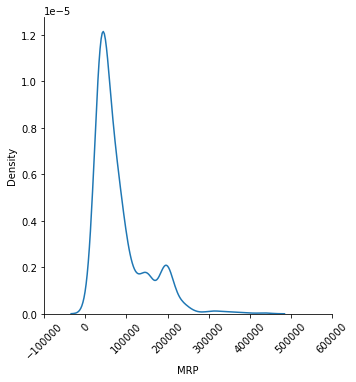

In [82]:
g = sns.displot(df.MRP, kind='kde')
g.set_xticklabels(rotation=45)
plt.xlabel('MRP')
plt.show()

In [83]:
print('Maximum MRP:', df['MRP'].max())
print('Minimun MRP:', df['MRP'].min())
print('Mean MRP:', df['MRP'].mean())
print('Median MRP:', df['MRP'].median())
print('Standard Deviation of MRP:', df['MRP'].std())

Maximum MRP: 434830
Minimun MRP: 14990
Mean MRP: 81605.8375
Median MRP: 59990.0
Standard Deviation of MRP: 61552.95510244973


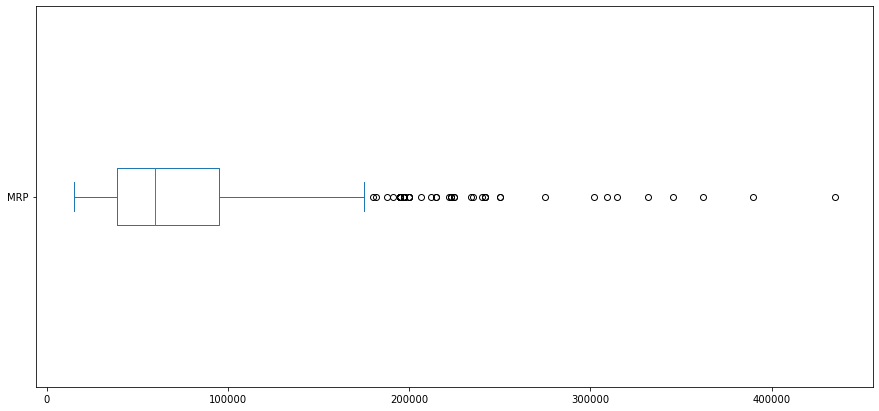

In [84]:
# Box Plot
plt.figure(figsize = (15, 7))
df.MRP.plot(kind = 'box', vert = False)
plt.show()

In [85]:
df.corr()['MRP']

Rating          0.331737
MRP             1.000000
Display CM      0.146699
Display INCH    0.146665
Touchscreen     0.045267
RAM Size GB     0.805204
HDD GB         -0.097983
SSD GB          0.773237
EMMC GB        -0.101957
Name: MRP, dtype: float64

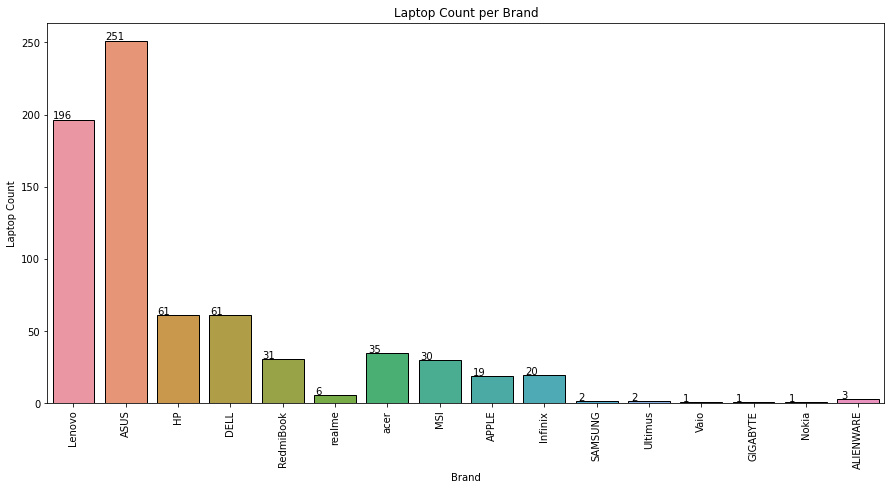

In [86]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x=df.Brand, edgecolor = 'black')
plt.title('Laptop Count per Brand')
plt.xlabel('Brand')
plt.ylabel('Laptop Count')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

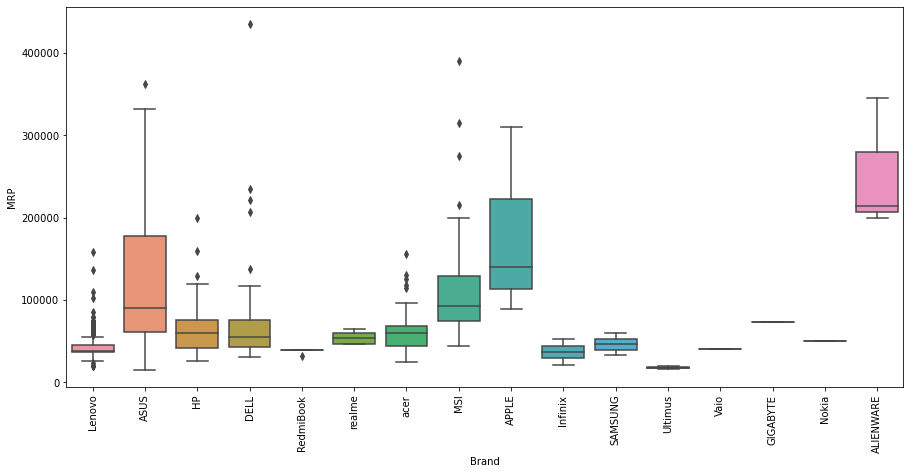

In [87]:
# Box Plot
plt.figure(figsize = (15, 7))
sns.boxplot(x = df.Brand, y = df.MRP)
plt.xticks(rotation=90)
plt.show()

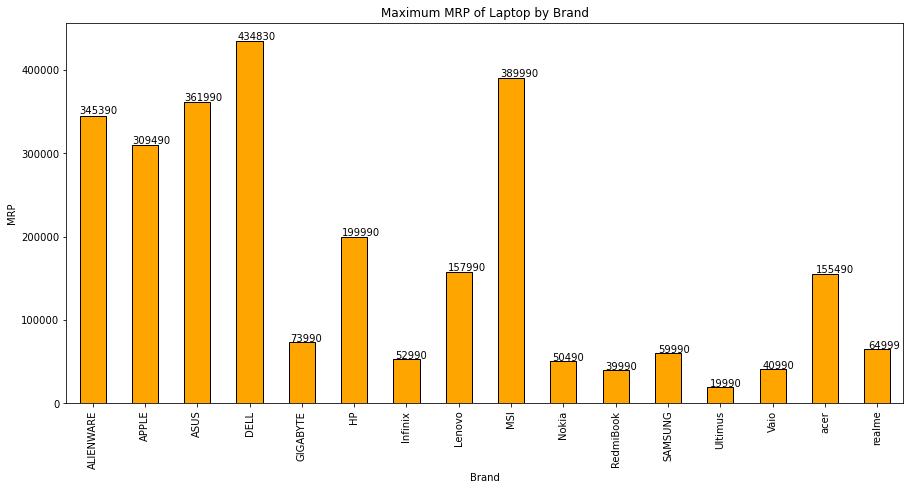

In [88]:
plt.figure(figsize=(15, 7))
ax = df.groupby(['Brand'])['MRP'].max().plot(kind = 'bar', color = 'orange', edgecolor = 'black')
plt.title('Maximum MRP of Laptop by Brand')
plt.xlabel('Brand')
plt.ylabel('MRP')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

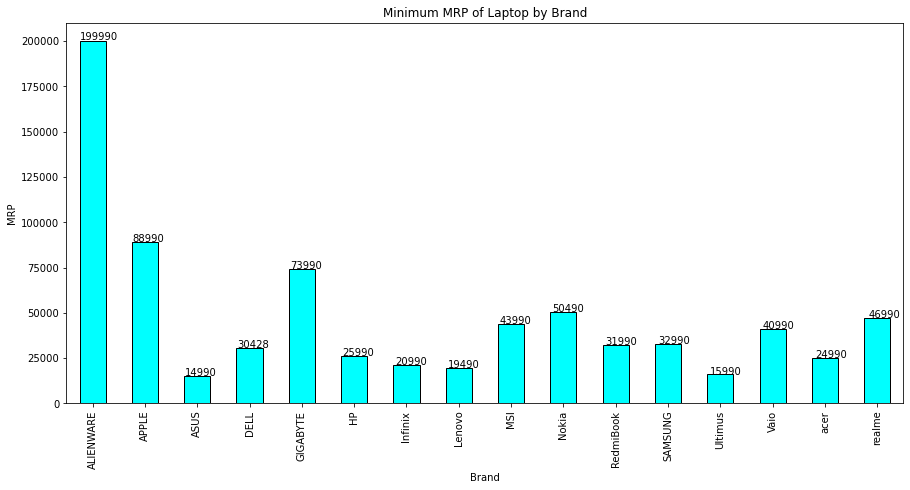

In [89]:
plt.figure(figsize=(15, 7))
ax = df.groupby(['Brand'])['MRP'].min().plot(kind = 'bar', color = 'cyan', edgecolor = 'black')
plt.title('Minimum MRP of Laptop by Brand')
plt.xlabel('Brand')
plt.ylabel('MRP')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [90]:
df.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                       
              min     max           mean
Brand                                   
ALIENWARE  199990  345390  253390.000000
APPLE       88990  309490  162332.105263
ASUS        14990  361990  115667.589641
DELL        30428  434830   73660.688525
GIGABYTE    73990   73990   73990.000000
HP          25990  199990   65195.557377
Infinix     20990   52990   36890.000000
Lenovo      19490  157990   45454.709184
MSI         43990  389990  121963.966667
Nokia       50490   50490   50490.000000
RedmiBook   31990   39990   39731.935484
SAMSUNG     32990   59990   46490.000000
Ultimus     15990   19990   17990.000000
Vaio        40990   40990   40990.000000
acer        24990  155490   64314.742857
realme      46990   64999   54324.833333

<AxesSubplot:>

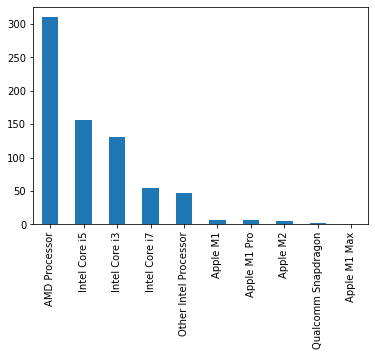

In [91]:
df['Cpu Brand'].value_counts().plot(kind='bar')

In [92]:
df.groupby(['Cpu Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                       
                          min     max           mean
Cpu Brand                                           
AMD Processor           24990  361990   96619.929032
Apple M1                88990  149990  108275.714286
Apple M1 Max           309490  309490  309490.000000
Apple M1 Pro           181990  241990  222490.000000
Apple M2               121990  139990  136390.000000
Intel Core i3           28590   54999   38818.671756
Intel Core i5           36990  129999   59834.500000
Intel Core i7           46990  314990  131628.654545
Other Intel Processor   14990  434830   84419.808511
Qualcomm Snapdragon     32990   59990   46490.000000

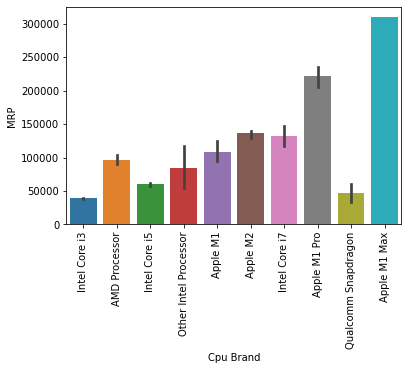

In [93]:
sns.barplot(x=df['Cpu Brand'],y=df['MRP'])
plt.xticks(rotation='vertical')
plt.show()

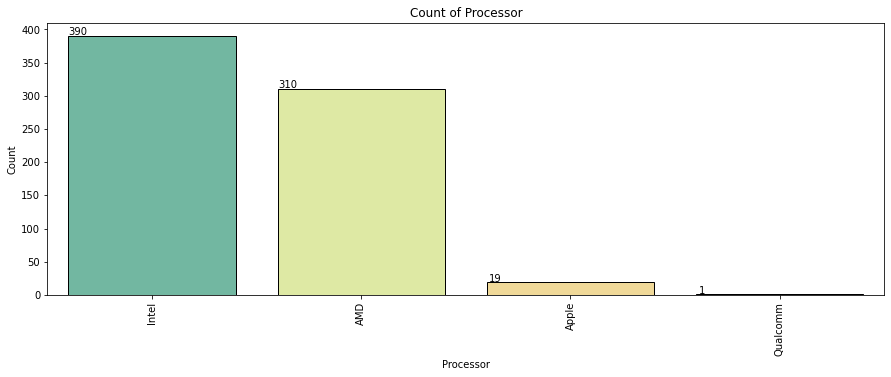

In [94]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x=df['Processor Brand'], data = df, palette = 'Spectral_r', edgecolor = 'black')
# sns.barplot(x='Processor',y='MRP',data=df, palette='rainbow')
plt.title('Count of Processor')
plt.xlabel('Processor')
plt.ylabel('Count')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [95]:
df.groupby(['Processor Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                       
                   min     max           mean
Processor Brand                              
AMD              24990  361990   96619.929032
Apple            88990  309490  162332.105263
Intel            14990  434830   65863.397436
Qualcomm         32990   32990   32990.000000

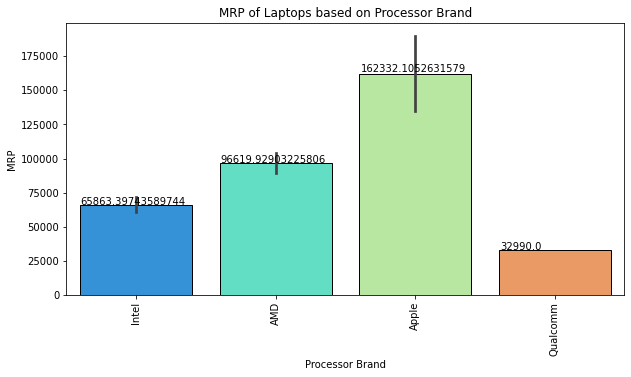

In [96]:
plt.figure(figsize=(10, 5))
# ax = sns.countplot(x=df['RAM Size'], data = df, palette = 'Set3', edgecolor = 'black')
ax = sns.barplot(x='Processor Brand',y='MRP',data=df, palette='rainbow', edgecolor = 'black')
plt.title('MRP of Laptops based on Processor Brand')
plt.xlabel('Processor Brand')
plt.ylabel('MRP')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

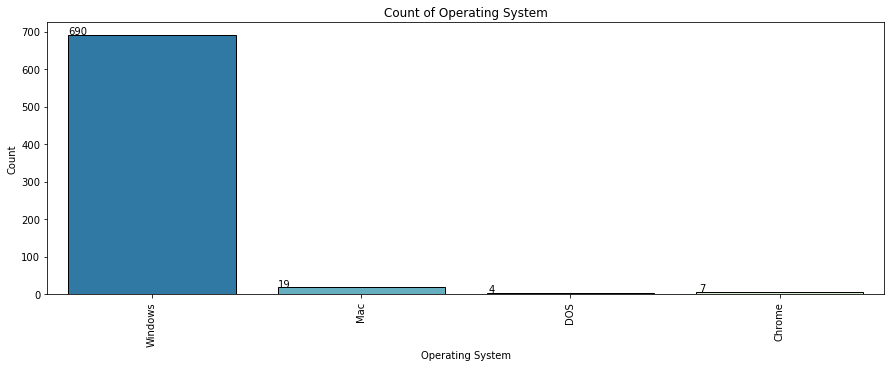

In [97]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x=df['Operating System'], data = df, palette = 'GnBu_r', edgecolor = 'black')
# sns.barplot(x='Processor',y='MRP',data=df, palette='rainbow')
plt.title('Count of Operating System')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [98]:
df.groupby(['Operating System']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                       
                    min     max           mean
Operating System                              
Chrome            14990   28490   22332.857143
DOS               15990   69990   35365.000000
Mac               88990  309490  162332.105263
Windows           19990  434830   80252.323188

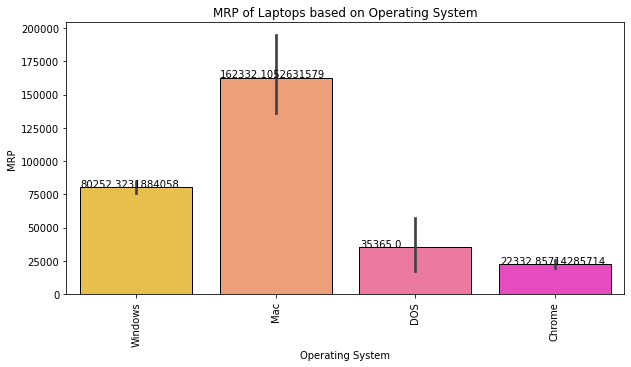

In [99]:
plt.figure(figsize=(10, 5))
# ax = sns.countplot(x=df['RAM Size'], data = df, palette = 'Set3', edgecolor = 'black')
ax = sns.barplot(x='Operating System',y='MRP',data=df, palette='spring_r', edgecolor = 'black')
plt.title('MRP of Laptops based on Operating System')
plt.xlabel('Operating System')
plt.ylabel('MRP')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

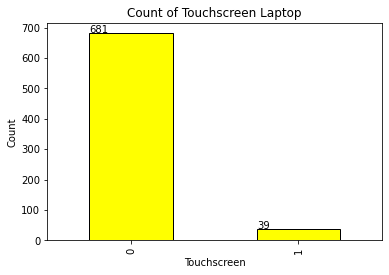

In [100]:
ax = df.Touchscreen.value_counts().plot(kind = 'bar', color = 'yellow', edgecolor = 'black')
plt.title('Count of Touchscreen Laptop')
plt.xlabel('Touchscreen')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [101]:
df.groupby(['Touchscreen']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                      
               min     max          mean
Touchscreen                             
0            15990  434830  80939.512482
1            14990  224990  93240.897436

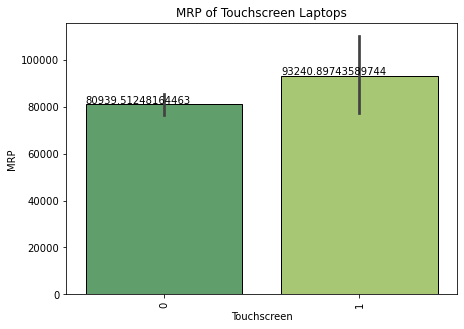

In [102]:
plt.figure(figsize=(7, 5))
# ax = sns.countplot(x=df['RAM Size'], data = df, palette = 'Set3', edgecolor = 'black')
ax = sns.barplot(x='Touchscreen',y='MRP',data=df, palette='summer', edgecolor = 'black')
plt.title('MRP of Touchscreen Laptops')
plt.xlabel('Touchscreen')
plt.ylabel('MRP')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [103]:
df['Display INCH'].value_counts()

15.60    492
14.00    137
13.30     18
16.00     16
17.30     11
11.60      9
16.10      8
13.40      5
16.20      5
14.10      4
15.00      4
13.60      3
35.00      2
14.20      2
13.00      1
14.96      1
13.50      1
16.60      1
Name: Display INCH, dtype: int64

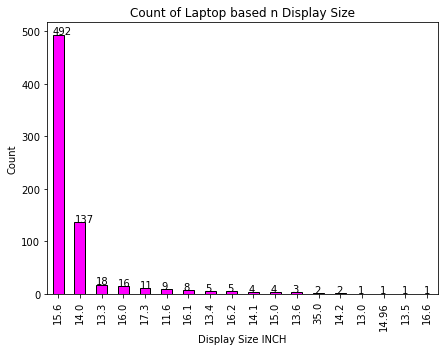

In [104]:
plt.figure(figsize=(7, 5))
ax = df['Display INCH'].value_counts().plot(kind = 'bar', color = 'magenta', edgecolor = 'black')
plt.title('Count of Laptop based n Display Size')
plt.xlabel('Display Size INCH')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

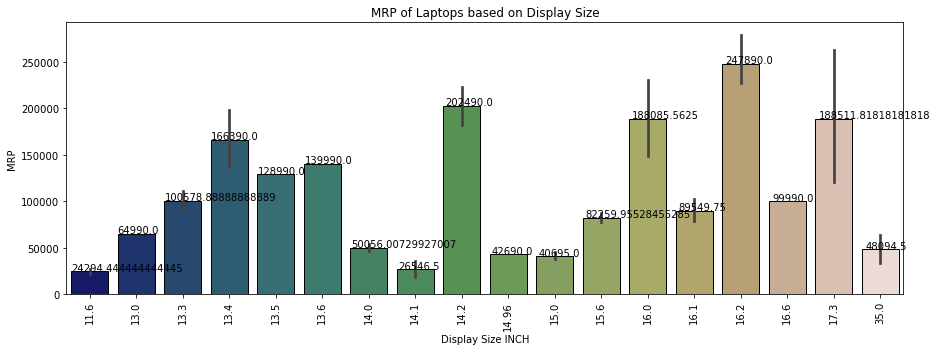

In [105]:
plt.figure(figsize=(15, 5))
# ax = sns.countplot(x=df['RAM Size'], data = df, palette = 'Set3', edgecolor = 'black')
ax = sns.barplot(x='Display INCH',y='MRP',data=df, palette='gist_earth', edgecolor = 'black')
plt.title('MRP of Laptops based on Display Size')
plt.xlabel('Display Size INCH')
plt.ylabel('MRP')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

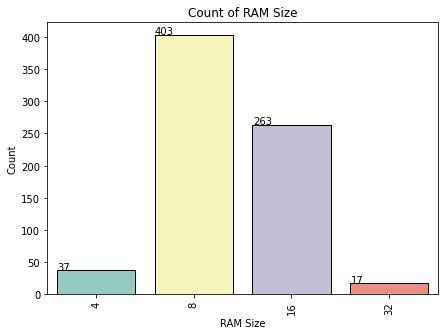

In [106]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=df['RAM Size GB'], data = df, palette = 'Set3', edgecolor = 'black')
# sns.barplot(x='Processor',y='MRP',data=df, palette='rainbow')
plt.title('Count of RAM Size')
plt.xlabel('RAM Size')
plt.ylabel('Count')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [107]:
df.groupby(['RAM Size GB']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                       
                min     max           mean
RAM Size GB                               
4             14990   61249   29448.027027
8             22990  149990   48788.905707
16            37990  241990  125825.577947
32           199990  434830  288974.705882

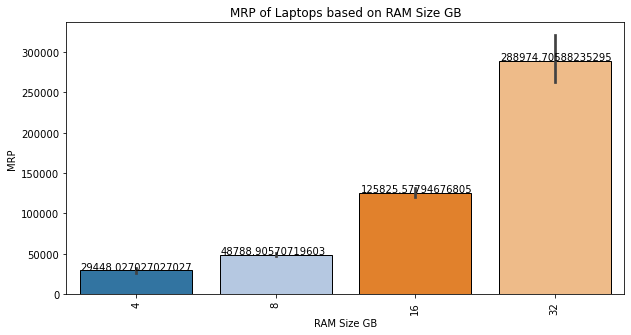

In [108]:
plt.figure(figsize=(10, 5))
# ax = sns.countplot(x=df['RAM Size'], data = df, palette = 'Set3', edgecolor = 'black')
ax = sns.barplot(x='RAM Size GB',y='MRP',data=df, palette='tab20', edgecolor = 'black')
plt.title('MRP of Laptops based on RAM Size GB')
plt.xlabel('RAM Size GB')
plt.ylabel('MRP')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

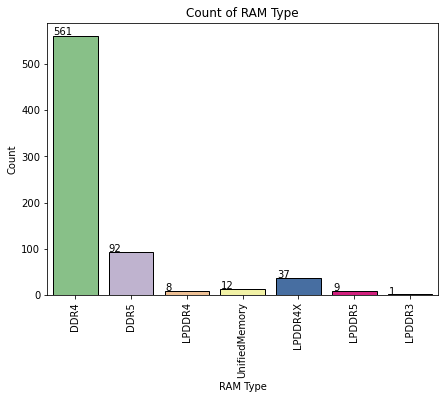

In [109]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=df['RAM Type'], data = df, palette='Accent', edgecolor = 'black')
# sns.barplot(x='Processor',y='MRP',data=df, palette='rainbow')
plt.title('Count of RAM Type')
plt.xlabel('RAM Type')
plt.ylabel('Count')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [110]:
df.groupby(['RAM Type']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                       
                  min     max           mean
RAM Type                                    
DDR4            19490  434830   63040.636364
DDR5            76590  389990  188289.858696
LPDDR3         233990  233990  233990.000000
LPDDR4          14990   71990   27040.000000
LPDDR4X         20990  224990   58328.081081
LPDDR5          89990  174990  125878.888889
UnifiedMemory  121990  309490  193865.000000

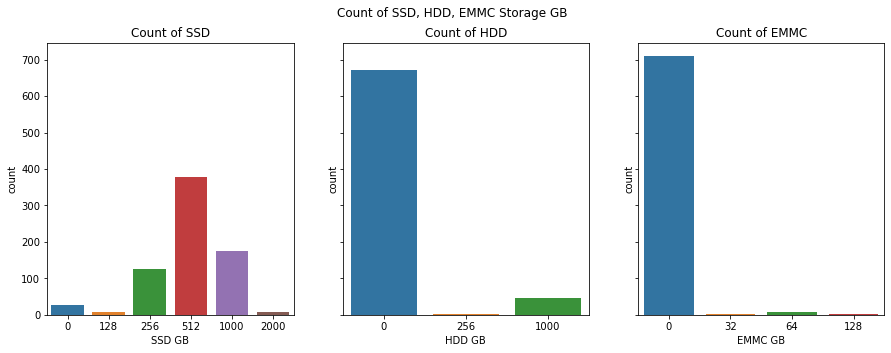

In [111]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15,5))
fig.suptitle('Count of SSD, HDD, EMMC Storage GB')
axes[0].set_title('Count of SSD')
axes[1].set_title('Count of HDD')
axes[2].set_title('Count of EMMC')

sns.countplot(df['SSD GB'], ax=axes[0])
sns.countplot(df['HDD GB'], ax=axes[1])
sns.countplot(df['EMMC GB'], ax=axes[2])
plt.show()

# sns.barplot(ax=axes[1], x=charmander.index, y=charmander.values)
# axes[1].set_title(charmander.name)

In [112]:
print(df.groupby(['SSD GB']).agg({'MRP' : ['min', 'max', 'mean']}))
print('\n')
print(df.groupby(['HDD GB']).agg({'MRP' : ['min', 'max', 'mean']}))
print('\n')
print(df.groupby(['EMMC GB']).agg({'MRP' : ['min', 'max', 'mean']}))

           MRP                       
           min     max           mean
SSD GB                               
0        14990   83990   36041.296296
128      15990  129999   42813.625000
256      19490  121990   43621.584000
512      29390  222990   59109.037135
1000     59990  434830  156652.522727
2000    233990  389990  304704.285714


          MRP                      
          min     max          mean
HDD GB                             
0       14990  434830  83270.278274
256     19490   19490  19490.000000
1000    27490  129999  59129.489362


           MRP                      
           min     max          mean
EMMC GB                             
0        15990  434830  82429.440845
32       14990   14990  14990.000000
64       19490   25990  22118.571429
128      28490   32990  30740.000000


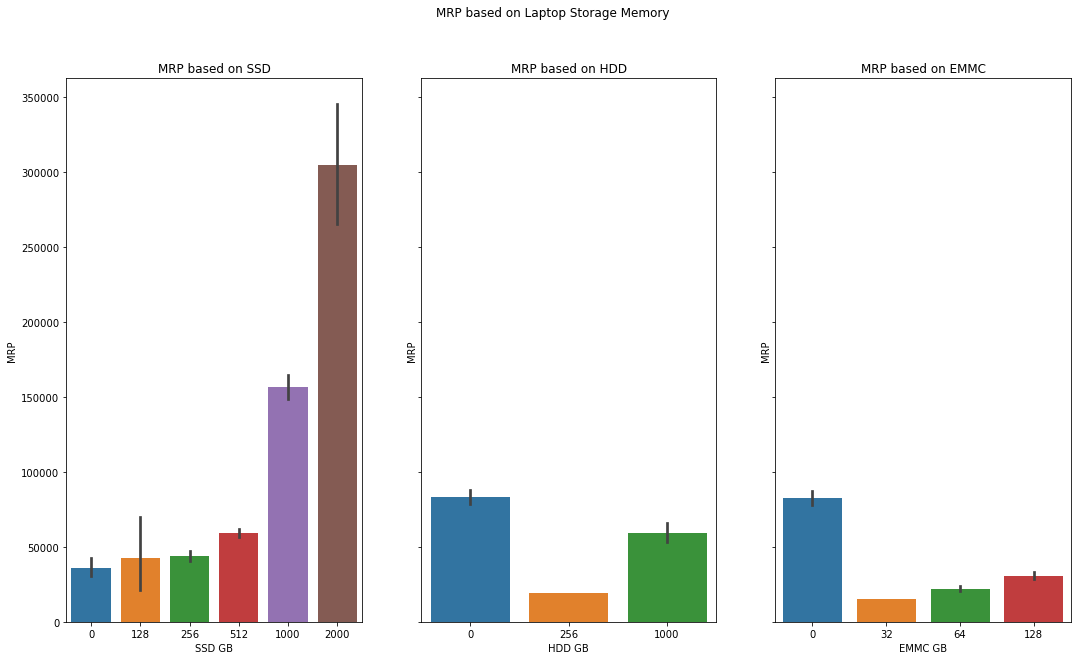

In [113]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(18, 10))
fig.suptitle('MRP based on Laptop Storage Memory')
axes[0].set_title('MRP based on SSD')
axes[1].set_title('MRP based on HDD')
axes[2].set_title('MRP based on EMMC')

sns.barplot(ax=axes[0], data=df, x='SSD GB', y='MRP')
sns.barplot(ax=axes[1], data=df, x='HDD GB', y='MRP')
sns.barplot(ax=axes[2], data=df, x='EMMC GB', y='MRP')
plt.show()

In [114]:
# plt.figure(figsize=(7, 5))
# ax = sns.countplot(x=df['Storage Size'], data = df, palette='Pastel1', edgecolor = 'black')
# # sns.barplot(x='Processor',y='MRP',data=df, palette='rainbow')
# plt.title('Count of Storage Size')
# plt.xlabel('Storage Size')
# plt.ylabel('Count')
# plt.xticks(rotation=90)

# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# plt.show()

In [115]:
# df.groupby(['Storage Size']).agg({'MRP' : ['min', 'max', 'mean']})

In [116]:
# plt.figure(figsize=(7, 5))
# ax = sns.countplot(x=df['Storage Type'], data = df, palette='RdYlBu', edgecolor = 'black')
# # sns.barplot(x='Processor',y='MRP',data=df, palette='rainbow')
# plt.title('Count of Storage Type')
# plt.xlabel('Storage Type')
# plt.ylabel('Count')
# plt.xticks(rotation=90)

# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# plt.show()

In [117]:
# df.groupby(['Storage Type']).agg({'MRP' : ['min', 'max', 'mean']})

In [118]:
# plt.figure(figsize=(15, 7))
#ax = sns.countplot(x=df.Rating, edgecolor = 'black')
#  ax = df.groupby(['Processor'])['MRP'].count().plot(kind = 'bar', color = 'green', edgecolor = 'black')
# sns.barplot(x='Processor',y='MRP',data=df, palette='rainbow')
# plt.title('Processor and MRP Relation')
# plt.xlabel('Processor')
# plt.ylabel('MRP')
# plt.xticks(rotation=90)

# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# plt.show()

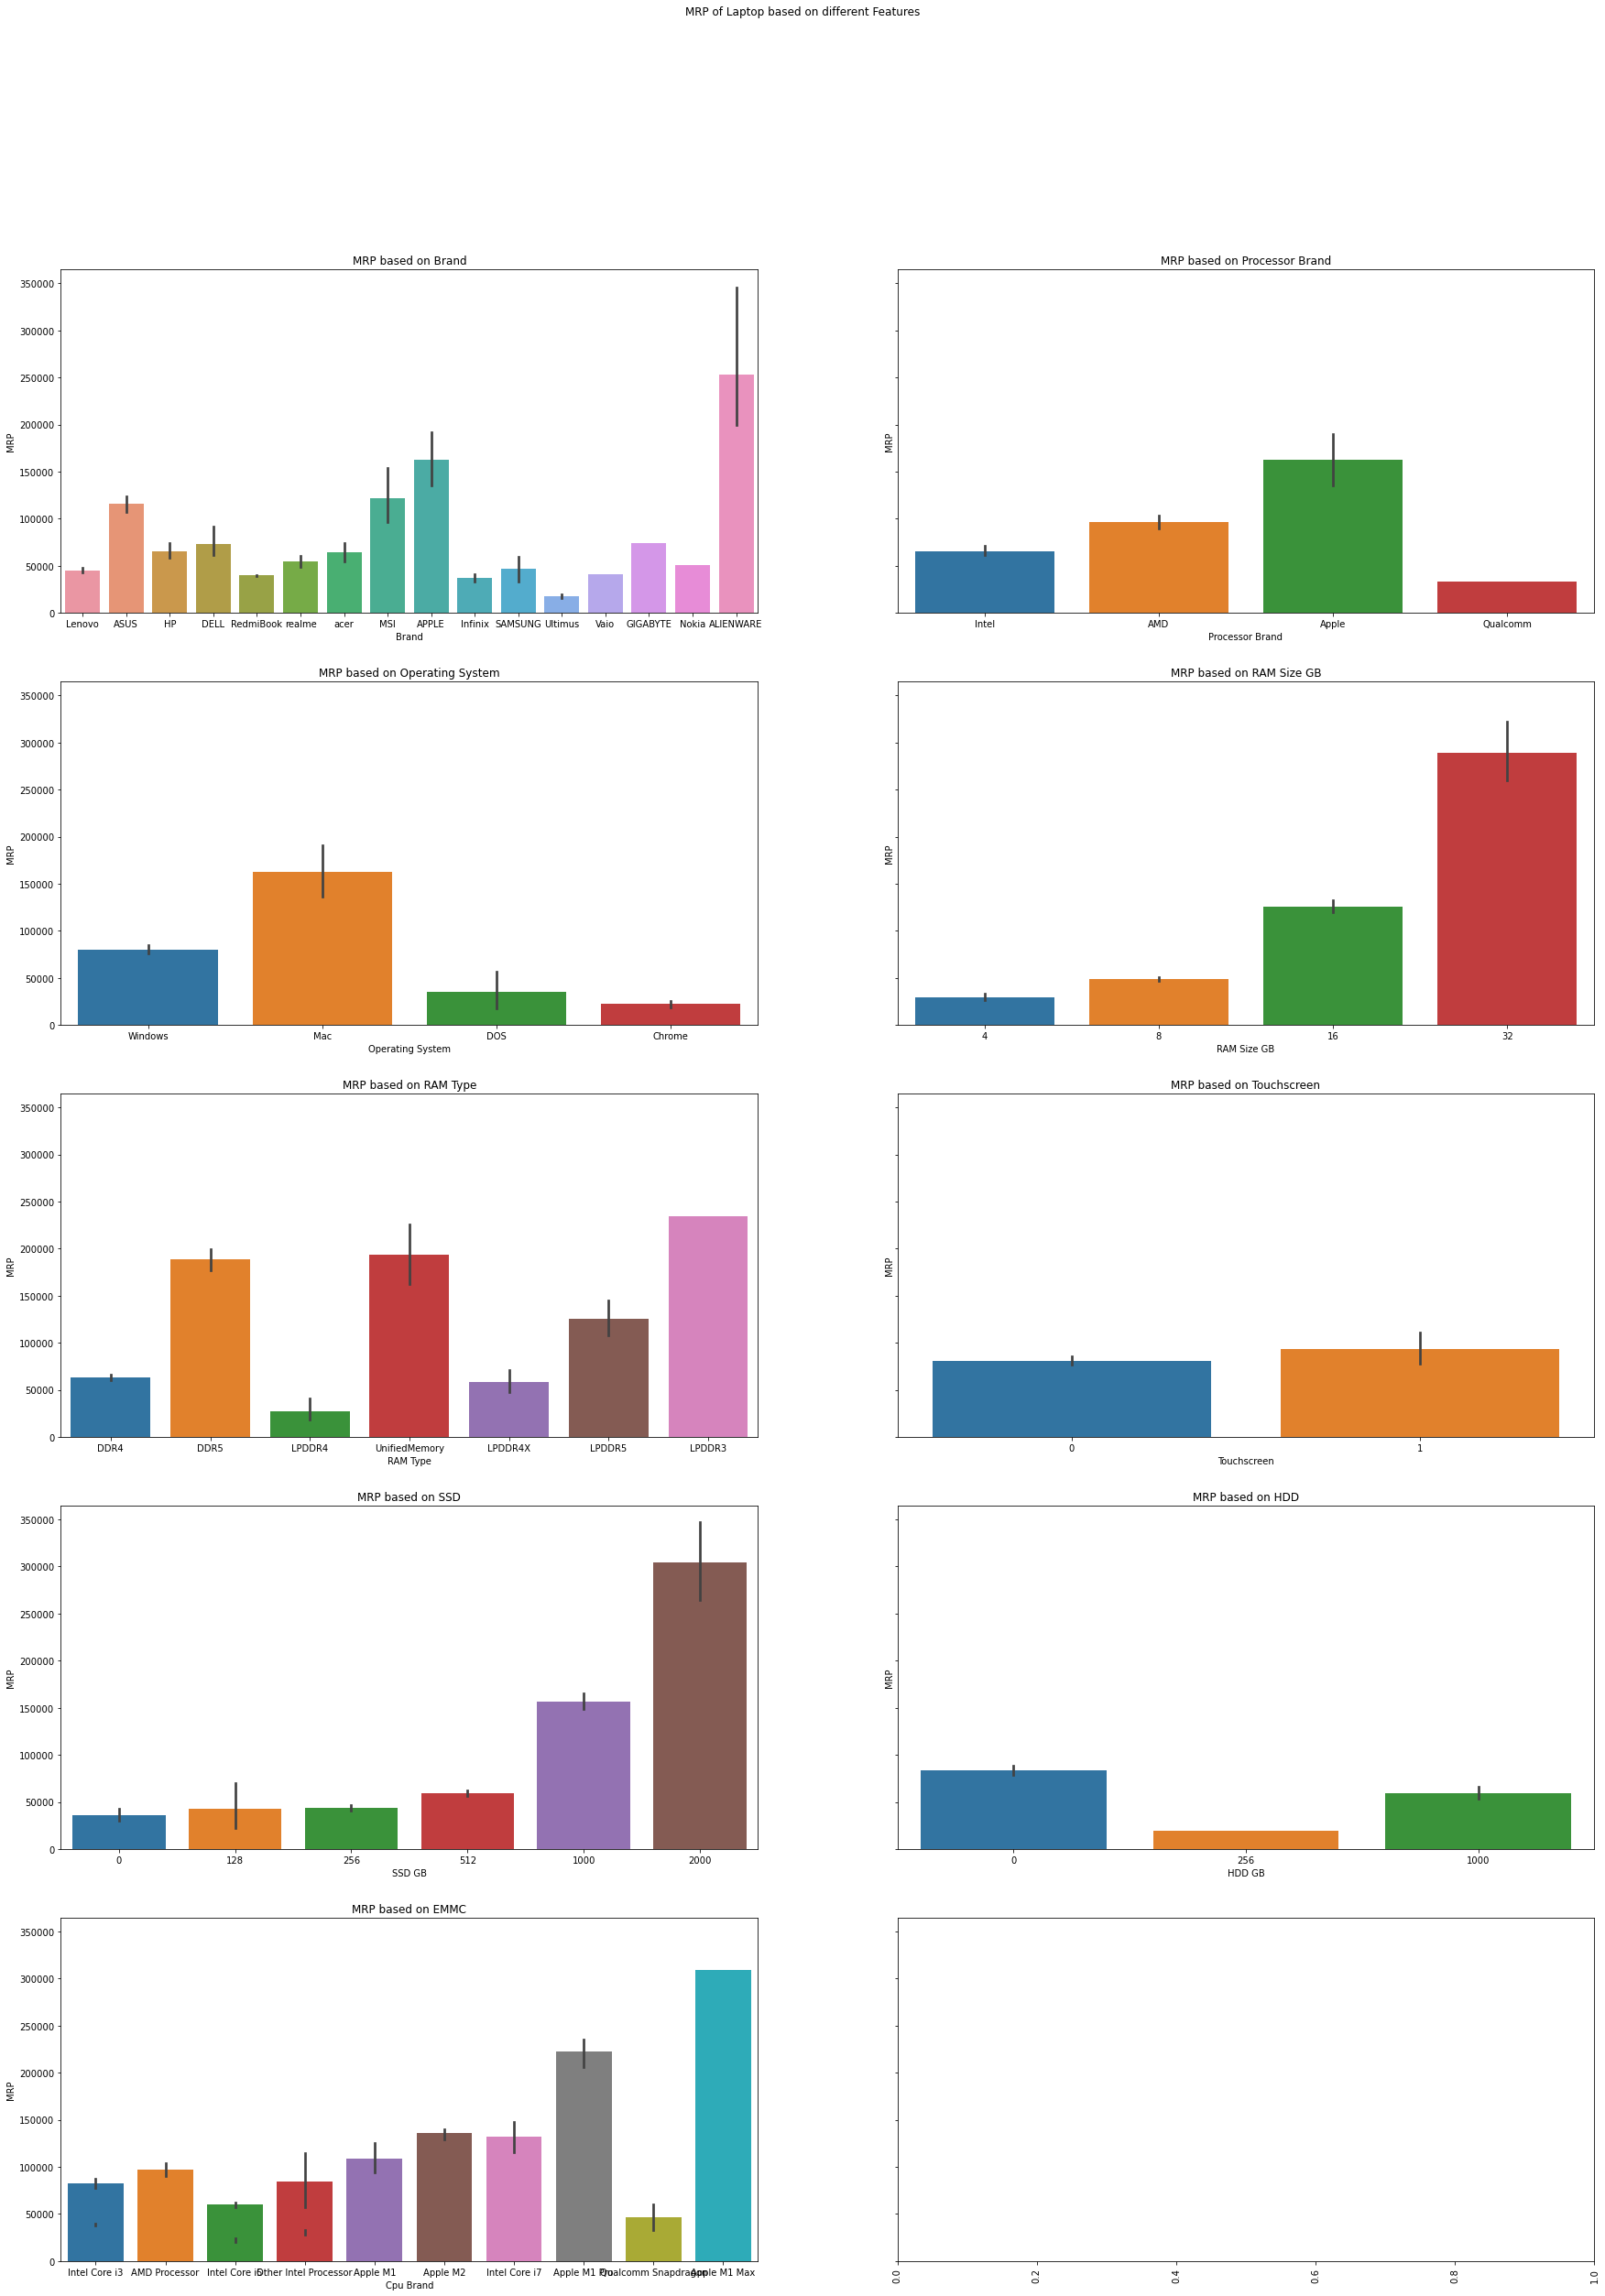

In [119]:
fig, axes = plt.subplots(5, 2, sharey=True, figsize=(30, 40))
fig.suptitle('MRP of Laptop based on different Features')
axes[0, 0].set_title('MRP based on Brand')
axes[0, 1].set_title('MRP based on Processor Brand')

axes[1, 0].set_title('MRP based on Operating System')
axes[1, 1].set_title('MRP based on RAM Size GB')

axes[2, 0].set_title('MRP based on RAM Type')
axes[2, 1].set_title('MRP based on Touchscreen')

axes[3, 0].set_title('MRP based on SSD')
axes[3, 1].set_title('MRP based on HDD')
axes[4, 0].set_title('MRP based on EMMC')

sns.barplot(ax=axes[0, 0], data=df, x='Brand', y='MRP')
sns.barplot(ax=axes[0, 1], data=df, x='Processor Brand', y='MRP')
sns.barplot(ax=axes[1, 0], data=df, x='Operating System', y='MRP')
sns.barplot(ax=axes[1, 1], data=df, x='RAM Size GB', y='MRP')
sns.barplot(ax=axes[2, 0], data=df, x='RAM Type', y='MRP')
sns.barplot(ax=axes[2, 1], data=df, x='Touchscreen', y='MRP')
sns.barplot(ax=axes[3, 0], data=df, x='SSD GB', y='MRP')
sns.barplot(ax=axes[3, 1], data=df, x='HDD GB', y='MRP')
sns.barplot(ax=axes[4, 0], data=df, x='EMMC GB', y='MRP')
sns.barplot(ax=axes[4, 0], data=df, x='Cpu Brand', y='MRP')

# axes.set_xticklabels(ax.get_xticklabels(),rotation=90)
# plt.xticks(rotation=90)
plt.xticks(rotation = 'vertical')

plt.show()

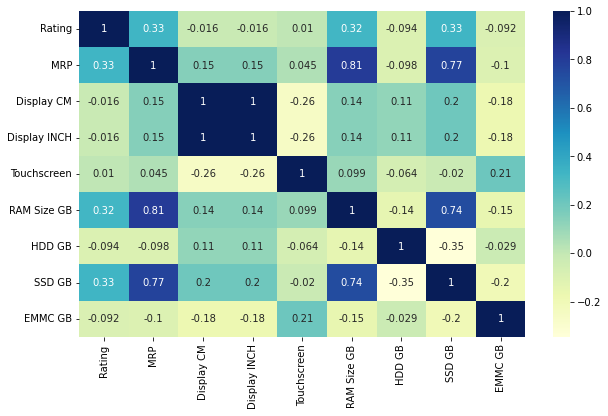

In [120]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

#### ML Prediction

In [121]:
df1 = df[['Cpu Brand', 'Processor Brand', 'Operating System', 'Display INCH', 'RAM Size GB', 'RAM Type', 'SSD GB', 'HDD GB', 'EMMC GB', 'MRP', 'Touchscreen']]
df1.to_csv('laptop_price_data.csv', index = False)
df1.head(10)

,Cpu Brand,Processor Brand,Operating System,Display INCH,RAM Size GB,RAM Type,SSD GB,HDD GB,EMMC GB,MRP,Touchscreen
0,Intel Core i3,Intel,Windows,14.0,8,DDR4,256,0,0,36990,0
1,Intel Core i3,Intel,Windows,15.6,8,DDR4,512,0,0,39990,0
2,Intel Core i3,Intel,Windows,15.6,8,DDR4,512,0,0,32990,0
3,AMD Processor,AMD,Windows,15.6,8,DDR4,512,0,0,49990,0
4,Intel Core i5,Intel,Windows,15.6,8,DDR4,512,0,0,49990,0
5,Intel Core i3,Intel,Windows,14.0,8,DDR4,256,0,0,36990,0
6,Other Intel Processor,Intel,Windows,15.6,8,DDR4,256,1000,0,38990,0
7,Intel Core i5,Intel,Windows,15.6,8,DDR4,512,0,0,39990,0
8,Intel Core i3,Intel,Windows,14.0,8,DDR4,256,0,0,46990,0
9,AMD Processor,AMD,Windows,14.0,16,DDR4,512,0,0,44990,0


In [122]:
df1.shape

(720, 11)

In [123]:
# Checking the Missing Rows
print(df['Cpu Brand'].value_counts())
print('\n')
print(df['Processor Brand'].value_counts())
print('\n')
print(df['Operating System'].value_counts())
print('\n')
print(df['Display INCH'].value_counts())
print('\n')
print(df['RAM Size GB'].value_counts())
print('\n')
print(df['RAM Size GB'].value_counts())
print('\n')
print(df['RAM Type'].value_counts())
print('\n')
print(df['SSD GB'].value_counts())
print('\n')
print(df['HDD GB'].value_counts())
print('\n')
print(df['EMMC GB'].value_counts())
print('\n')
print(df['Touchscreen'].value_counts())

AMD Processor            310
Intel Core i5            156
Intel Core i3            131
Intel Core i7             55
Other Intel Processor     47
Apple M1                   7
Apple M1 Pro               6
Apple M2                   5
Qualcomm Snapdragon        2
Apple M1 Max               1
Name: Cpu Brand, dtype: int64


Intel       390
AMD         310
Apple        19
Qualcomm      1
Name: Processor Brand, dtype: int64


Windows    690
Mac         19
Chrome       7
DOS          4
Name: Operating System, dtype: int64


15.60    492
14.00    137
13.30     18
16.00     16
17.30     11
11.60      9
16.10      8
13.40      5
16.20      5
14.10      4
15.00      4
13.60      3
35.00      2
14.20      2
13.00      1
14.96      1
13.50      1
16.60      1
Name: Display INCH, dtype: int64


8     403
16    263
4      37
32     17
Name: RAM Size GB, dtype: int64


8     403
16    263
4      37
32     17
Name: RAM Size GB, dtype: int64


DDR4             561
DDR5              92
LPDDR4X           

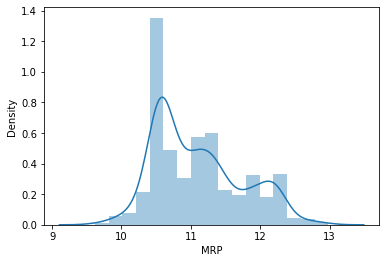

In [124]:
sns.distplot(np.log(df1['MRP']))
plt.xlabel('MRP')
plt.show()

In [125]:
# df1 = df[df['Processor Brand'] !='Qualcomm']

In [126]:
# df1 = df1[df1['Operating System'] != 'Chrome']
# df1 = df1[df1['Operating System'] != 'DOS']
# df1 =df1.drop(columns=['Display INCH'])

In [127]:
# !pip install xgboost

In [128]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [129]:
#### One-Hot Encoding
# df1 = pd.get_dummies(df1)
# df1.head()

In [130]:
# df1.columns

#### Model Building and Selection

In [131]:
X = df1.drop(columns = ['MRP'])
y = np.log(df1['MRP'])

In [132]:
X

,Cpu Brand,Processor Brand,Operating System,Display INCH,RAM Size GB,RAM Type,SSD GB,HDD GB,EMMC GB,Touchscreen
0,Intel Core i3,Intel,Windows,14.0,8,DDR4,256,0,0,0
1,Intel Core i3,Intel,Windows,15.6,8,DDR4,512,0,0,0
2,Intel Core i3,Intel,Windows,15.6,8,DDR4,512,0,0,0
3,AMD Processor,AMD,Windows,15.6,8,DDR4,512,0,0,0
4,Intel Core i5,Intel,Windows,15.6,8,DDR4,512,0,0,0
...,...,...,...,...,...,...,...,...,...,...
715,Other Intel Processor,Intel,Chrome,11.6,4,LPDDR4,0,0,64,1
716,AMD Processor,AMD,Windows,15.6,8,DDR4,512,0,0,0
717,AMD Processor,AMD,Windows,15.6,16,DDR5,1000,0,0,0
718,Intel Core i7,Intel,Windows,14.0,16,LPDDR5,512,0,0,1


In [133]:
y

0      10.518403
1      10.596385
2      10.403960
3      10.819578
4      10.819578
         ...    
715    10.064330
716    11.204905
717    12.180704
718    11.743958
719    10.839385
Name: MRP, Length: 720, dtype: float64

#### test-train set

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 2)

In [135]:
X_train

,Cpu Brand,Processor Brand,Operating System,Display INCH,RAM Size GB,RAM Type,SSD GB,HDD GB,EMMC GB,Touchscreen
376,AMD Processor,AMD,Windows,15.6,8,DDR4,512,0,0,0
631,AMD Processor,AMD,Windows,15.6,16,DDR5,1000,0,0,0
655,AMD Processor,AMD,Windows,13.4,32,LPDDR4X,1000,0,0,1
683,Intel Core i7,Intel,Windows,15.6,16,DDR5,512,0,0,0
156,AMD Processor,AMD,Windows,15.6,8,DDR4,512,0,0,0
...,...,...,...,...,...,...,...,...,...,...
534,Intel Core i7,Intel,Windows,15.6,16,DDR5,1000,0,0,0
584,Intel Core i5,Intel,Windows,15.6,16,DDR4,512,0,0,0
493,AMD Processor,AMD,Windows,15.6,8,DDR4,256,0,0,0
527,AMD Processor,AMD,Windows,15.6,8,DDR4,512,0,0,0


In [136]:
X_train.shape, X_test.shape

((612, 10), (108, 10))

#### model training

##### Linear Regression

In [138]:
# features = ["processor", "ram", "os", "Storage"]
# target = 'MRP'


step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,5])
],remainder='passthrough')

# X = step1.fit_transform([0,1,2,3,6])
# y =

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.868530902725135
MAE 0.188718627828866


##### Ridge Regression

In [139]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,5])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8613411245242135
MAE 0.1964209415990666


##### Lasso Regression

In [140]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,5])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8686074859690783
MAE 0.19076871984161348


##### KNN

In [141]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,5])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8695264112326785
MAE 0.1635416924143436


##### Decision Tree

In [142]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,5])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8493001305254538
MAE 0.19220562190941923


##### SVM

In [143]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,5])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7710131023101481
MAE 0.19838894597903886


##### Random Forest

In [144]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,5])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8974256016265372
MAE 0.16409186191271286


In [145]:
##### Extra Trees

In [146]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,5])
# ],remainder='passthrough')

# step2 = ExtraTreesRegressor(n_estimators=100,
#                               random_state=3,
#                               max_samples=0.5,
#                               max_features=0.75,
#                               max_depth=15)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

##### AdaBoost

In [147]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,5])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8189069359808163
MAE 0.23509801341342082


##### Gradient Boost

In [148]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,5])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.904313936090576
MAE 0.15498071378317815


##### XgBoost

In [149]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,5])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9077533778518598
MAE 0.15268167159870238


In [150]:
##### Voting Regressor

In [151]:
# from sklearn.ensemble import VotingRegressor,StackingRegressor

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,5])
# ],remainder='passthrough')


# rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
# gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
# xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
# et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

# step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

##### Stacking

In [152]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,5])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8952284931400789
MAE 0.17721936340623132


##### Exporting Model

In [153]:
import pickle

pickle.dump(df1,open('df1.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [154]:
df1

,Cpu Brand,Processor Brand,Operating System,Display INCH,RAM Size GB,RAM Type,SSD GB,HDD GB,EMMC GB,MRP,Touchscreen
0,Intel Core i3,Intel,Windows,14.0,8,DDR4,256,0,0,36990,0
1,Intel Core i3,Intel,Windows,15.6,8,DDR4,512,0,0,39990,0
2,Intel Core i3,Intel,Windows,15.6,8,DDR4,512,0,0,32990,0
3,AMD Processor,AMD,Windows,15.6,8,DDR4,512,0,0,49990,0
4,Intel Core i5,Intel,Windows,15.6,8,DDR4,512,0,0,49990,0
...,...,...,...,...,...,...,...,...,...,...,...
715,Other Intel Processor,Intel,Chrome,11.6,4,LPDDR4,0,0,64,23490,1
716,AMD Processor,AMD,Windows,15.6,8,DDR4,512,0,0,73490,0
717,AMD Processor,AMD,Windows,15.6,16,DDR5,1000,0,0,194990,0
718,Intel Core i7,Intel,Windows,14.0,16,LPDDR5,512,0,0,125990,1


In [155]:
X_train

,Cpu Brand,Processor Brand,Operating System,Display INCH,RAM Size GB,RAM Type,SSD GB,HDD GB,EMMC GB,Touchscreen
376,AMD Processor,AMD,Windows,15.6,8,DDR4,512,0,0,0
631,AMD Processor,AMD,Windows,15.6,16,DDR5,1000,0,0,0
655,AMD Processor,AMD,Windows,13.4,32,LPDDR4X,1000,0,0,1
683,Intel Core i7,Intel,Windows,15.6,16,DDR5,512,0,0,0
156,AMD Processor,AMD,Windows,15.6,8,DDR4,512,0,0,0
...,...,...,...,...,...,...,...,...,...,...
534,Intel Core i7,Intel,Windows,15.6,16,DDR5,1000,0,0,0
584,Intel Core i5,Intel,Windows,15.6,16,DDR4,512,0,0,0
493,AMD Processor,AMD,Windows,15.6,8,DDR4,256,0,0,0
527,AMD Processor,AMD,Windows,15.6,8,DDR4,512,0,0,0


In [156]:
#### Hyperparameter Tunning

In [157]:
# from sklearn.model_selection import GridSearchCV

# parameters = {'n_estimators':[10, 50, 100],
#               'criterion':['squared_error','absolute_error','poisson']}

# grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)

# grid_fit = grid_obj.fit(X_train, y_train)

# best_model = grid_fit.best_estimator_

# best_model.score(X_test, y_test)

In [158]:
#### Cross-Validation

In [159]:
# from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit

# xgb=XGBRegressor(n_estimators=100,max_depth=2, max_leaves=2, booster='gbtree', learning_rate=0.19)

# k=ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
# score=cross_val_score(xgb, X,y, cv=k)
# print("Cross validations Score:\n", score)
# print("Average Cross validations Score:", score.mean())
# print("Maximum Cross validations Score:", score.max())
# print("Minimum Cross validations Score:", score.min())

In [160]:
# import nltk
# import sklearn

# print('The nltk version is {}.'.format(nltk.__version__))
# print('The scikit-learn version is {}.'.format(sklearn.__version__))

# The nltk version is 3.0.0.
# The scikit-learn version is 0.15.2.

In [161]:
# Name: scikit-learn
# Version: 1.2.2

In [162]:
# pip install -U scikit-learn